In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 22.9 MB/s 
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 58.3 MB/s 
     |████████████████████████████████| 6.0 MB 53.7 MB/s 
     |████████████████████████████████| 439 kB 69.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [ ]:
from google.colab import drive
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP Project/complaints_clean.csv')

In [ ]:
df.head()

,complaint_what_happened,Topic,Topic_ID
0,good morning my name is xxxx xxxx and i apprec...,Bank account services,0
1,i upgraded my xxxx xxxx card in and was told ...,Credit card / Prepaid card,1
2,chase card was reported on however fraudulent...,Credit card / Prepaid card,1
3,on while trying to book a xxxx xxxx ticket ...,Credit card / Prepaid card,1
4,my grand son give me check for i deposit it i...,Bank account services,0


In [ ]:
df.Topic_ID.value_counts()

0    5250
1    5010
3    4736
4    3816
2    2260
Name: Topic_ID, dtype: int64

In [ ]:
df.shape

(21072, 3)

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

complaint_what_happened    3
Topic                      0
Topic_ID                   0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(21069, 3)

In [ ]:
df.isnull().sum()

complaint_what_happened    0
Topic                      0
Topic_ID                   0
dtype: int64

In [ ]:
X = df['complaint_what_happened']

In [ ]:
y = df['Topic_ID']

In [ ]:
print(y[0:9])

0    0
1    1
2    1
3    1
4    0
5    1
6    0
7    2
8    3
Name: Topic_ID, dtype: int64


In [ ]:
print(X[0:9])

0    good morning my name is xxxx xxxx and i apprec...
1    i upgraded my xxxx xxxx card in  and was told ...
2    chase card was reported on  however fraudulent...
3    on  while trying to book a xxxx  xxxx  ticket ...
4    my grand son give me check for  i deposit it i...
5                        can you please remove inquiry
6    with out notice jp morgan chase restricted my ...
7    during the summer months i experience a declin...
8    on xxxx  i made a  payment to an online retail...
Name: complaint_what_happened, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [ ]:
print(y_train[0:10])

18301    1
1026     0
1416     1
18036    1
10208    0
15886    2
14300    1
10319    4
8897     4
9400     0
Name: Topic_ID, dtype: int64


In [ ]:
X_train.shape

(16855,)


In [ ]:
y_train.shape

(16855,)

In [ ]:
y_test.shape

(4214,)

In [ ]:
X_test.shape

(4214,)

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Hidden layer 1
hidden1 = tf.keras.layers.Dense(512, activation='relu')(outputs['pooled_output'])
# Dropout layer 1
dropout1 = tf.keras.layers.Dropout(0.20)(hidden1)
# Hidden layer 2
hidden2 = tf.keras.layers.Dense(128, activation='relu')(dropout1)
# Dropout layer 2
dropout2 = tf.keras.layers.Dropout(0.10)(hidden2)
# Output layer
outputs = tf.keras.layers.Dense(5, activation='softmax')(dropout2)


# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [outputs])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [ ]:
#Compiling the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
527/527 [==============================] - 177s 336ms/step - loss: 1.3993 - accuracy: 0.3983
Epoch 2/100
527/527 [==============================] - 178s 338ms/step - loss: 1.3214 - accuracy: 0.4504
Epoch 3/100
527/527 [==============================] - 178s 337ms/step - loss: 1.3041 - accuracy: 0.4575
Epoch 4/100
527/527 [==============================] - 178s 337ms/step - loss: 1.2593 - accuracy: 0.4824
Epoch 5/100
527/527 [==============================] - 177s 337ms/step - loss: 1.2771 - accuracy: 0.4786
Epoch 6/100
527/527 [==============================] - 177s 337ms/step - loss: 1.2720 - accuracy: 0.4812
Epoch 7/100
527/527 [==============================] - 177s 336ms/step - loss: 1.2802 - accuracy: 0.4740
Epoch 8/100
527/527 [==============================] - 177s 336ms/step - loss: 1.2688 - accuracy: 0.4823
Epoch 9/100
527/527 [==============================] - 177s 337ms/step - loss: 1.2567 - accuracy: 0.4911
Epoch 10/100
527/527 [==============================] -

In [39]:
# Save the model to a TensorFlow SavedModel directory

model.save('/content/drive/MyDrive/NLP Project/2ndbert_model', save_format='tf')

In [40]:
from tensorflow.keras.models import load_model


# Load the model from a TensorFlow SavedModel directory
model = load_model('/content/drive/MyDrive/NLP Project/2ndbert_model')

In [41]:
predictions = model.predict(X_test)

132/132 [==============================] - 42s 316ms/step


In [42]:
loss, accuracy = model.evaluate(X_test, y_test)

132/132 [==============================] - 42s 315ms/step - loss: 1.1528 - accuracy: 0.5354


In [43]:
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.1527869701385498
Test accuracy: 0.5353583097457886


In [44]:
max_value = []
tup_class = []
final_class = []
l = len(predictions)

for i in range(0,l):
    max_value.append(np.amax(predictions[i]))
    tup_class.append(np.where(predictions[i] == max_value[i]))
    final_class = np.ravel(tup_class)


In [45]:
predictions[0:10]

array([[0.11010696, 0.08944708, 0.10647421, 0.66989267, 0.02407907],
       [0.1050943 , 0.07497458, 0.13180064, 0.6478173 , 0.0403131 ],
       [0.02682179, 0.05256001, 0.24359578, 0.03129213, 0.64573026],
       [0.00601418, 0.01351815, 0.1451663 , 0.00598106, 0.8293203 ],
       [0.00608894, 0.01172153, 0.12185199, 0.00468861, 0.855649  ],
       [0.61930853, 0.02598273, 0.03970695, 0.29288197, 0.02211981],
       [0.23239915, 0.10942592, 0.08483634, 0.5532851 , 0.02005346],
       [0.8242428 , 0.01446834, 0.0161958 , 0.1371844 , 0.00790877],
       [0.11142784, 0.10118054, 0.0912611 , 0.67836624, 0.01776421],
       [0.08765429, 0.04896993, 0.08351336, 0.75654095, 0.02332148]],
      dtype=float32)

In [46]:
final_class[0:10]

array([3, 3, 4, 4, 4, 0, 3, 0, 3, 3])

In [47]:
y_test[0:10]

53       0
4271     2
12923    4
11650    4
17124    4
4986     0
8901     0
14633    0
14005    1
2217     3
Name: Topic_ID, dtype: int64

In [48]:
y_test.value_counts()

0    1059
3     971
1     960
4     777
2     447
Name: Topic_ID, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix = confusion_matrix(y_test, final_class)

print(confusion_matrix)


[[689   2   3 340  25]
 [ 58 104  41 728  29]
 [ 35   2  53 293  64]
 [ 51   4  12 897   7]
 [ 50  11  70 133 513]]


Text(33.0, 0.5, 'Truth')

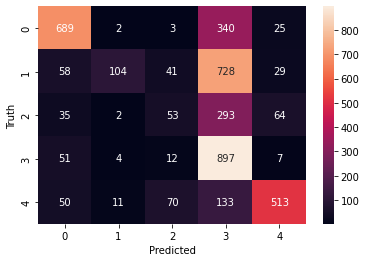

In [51]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')